0 MOUSE [773 213 500 494] 0.5962727069854736
1 LAPTOP [ 115  129 1251 1658] 0.548617422580719
3 MOUSE [ 586 1160  506  557] 0.4945871829986572
5 KNIFE [299 772 175 956] 0.34729868173599243


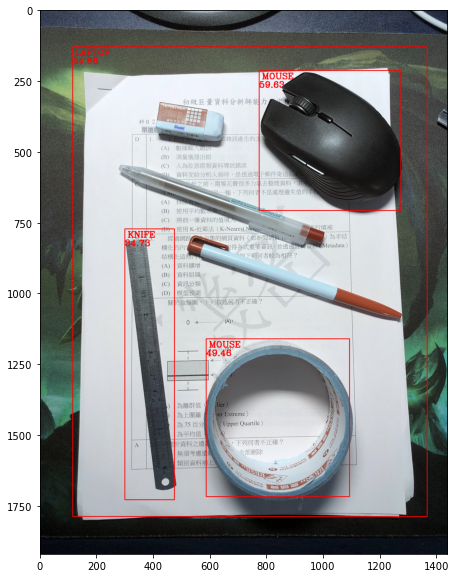

In [66]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# tutorial 1: https://www.youtube.com/watch?v=HXDD7-EnGBY&t=279s
# tutorial 1: https://www.youtube.com/watch?v=diWDgKcH3E0
# model url: https://drive.google.com/file/d/1rphJIFgGJVRJ-3QPeH_aeHhGE5P6CnDm/view

thres = 0.3 # Threshold to detect object
nms_threshold = 0.2

classNames= []
classFile = './coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

    
configPath = './ssd/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = './ssd/frozen_inference_graph.pb'

net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

imgPath = './object_data/'
imgList = [i for i in os.listdir(imgPath) if 'jpeg' in i]
fname = random.choice(imgList)
img = cv2.imread(os.path.join(imgPath, fname))

classIds, confs, bbox = net.detect(img,confThreshold=thres)
# print(classIds,bbox)

bbox = list(bbox)
confs = list(np.array(confs).reshape(1,-1)[0])
confs = list(map(float,confs))
indices = cv2.dnn.NMSBoxes(bbox,confs,thres,nms_threshold)

for i in indices:
    i = i[0]
    name = classNames[classIds[i][0]-1].upper()
    box = bbox[i]
    conf = confs[i]
    print(i, name, box, conf)
    x,y,w,h = box[0],box[1],box[2],box[3]
    cv2.rectangle(img, (x,y),(x+w,h+y), color=(255, 0, 0), thickness=2)
    cv2.putText(img,classNames[classIds[i][0]-1].upper(),(box[0]+10,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    cv2.putText(img,str(round(conf*100,2)),(box[0],box[1]+60),
            cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    

plt.figure(figsize=(10, 10))        
plt.imshow(img)

TEDDY BEAR 58.01
TEDDY BEAR 44.32
TEDDY BEAR 44.0
TEDDY BEAR 43.41
TEDDY BEAR 41.53
TEDDY BEAR 40.35
TEDDY BEAR 39.2
TEDDY BEAR 38.49
TEDDY BEAR 37.03
WINDOW 35.64
TEDDY BEAR 35.52
MICROWAVE 33.22
CLOCK 31.6
SPOON 30.86


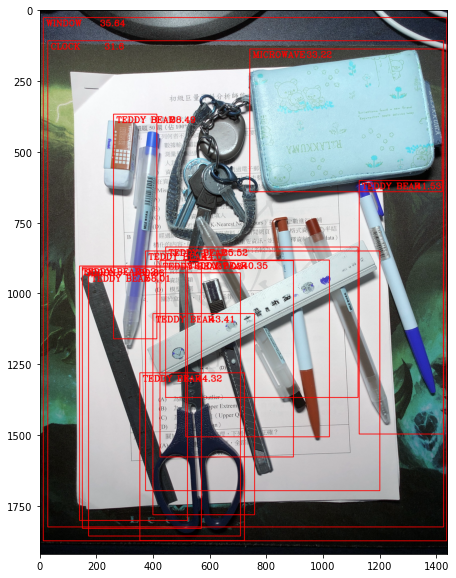

In [39]:
import cv2
import matplotlib.pyplot as plt
import os
import random

thres = 0.3 # Threshold to detect object

classNames= []
classFile = './coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

    
configPath = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = './frozen_inference_graph.pb'

net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

imgPath = './object_data/'
imgList = [i for i in os.listdir(imgPath) if 'jpeg' in i]
# fname = random.choice(imgList)
img = cv2.imread(os.path.join(imgPath, fname))

classIds, confs, bbox = net.detect(img,confThreshold=thres)
# print(classIds,bbox)    
    
if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        print(classNames[classId].upper(), str(round(confidence*100,2)))
        cv2.rectangle(img,box,color=(255,0,0),thickness=2)
        cv2.putText(
            img,
            classNames[classId].upper(),
            (box[0]+10,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,
            1,
            (255,0,0),
            2
        )
        cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)

plt.figure(figsize=(10, 10))        
plt.imshow(img)